In [1]:
# importamos las librerías que necesitamos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, poisson, chisquare, expon, chi2_contingency, ttest_ind
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
# ------------------------------------------------------------------------------
# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

# ------------------------------------------------------------------------------
import scipy.stats as stats

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import levene
from scipy.stats import mannwhitneyu

In [2]:
sns.set_style("whitegrid")
sns.set_theme(style="dark")
plt.style.use('Solarize_Light2')
sns.set_palette('twilight')

# Fase 1: Exploración y Limpieza

- Exploración Inicial:
        - Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
        - Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
        - Une los dos conjuntos de datos de la forma más eficiente.
-    Limpieza de Datos:
        - Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
        - Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.

In [3]:

df_activity = pd.read_csv("../promo-F-DA-modulo3-evaluacion-final-MargaObrador/Files/Customer_Flight_Activity.csv", index_col = None)
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [4]:

df_loyalty = pd.read_csv("../promo-F-DA-modulo3-evaluacion-final-MargaObrador/Files/Customer_Loyalty_History.csv", index_col = None)
df_loyalty.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


### Rename de los nombres para quitar espacios y mayúsculas:

In [5]:
# df_activity
nuevos_nombres = {nombre_columna: nombre_columna.lower().replace(' ', '_') for nombre_columna in df_activity.columns}
df_activity = df_activity.rename(columns=nuevos_nombres)

In [6]:
# df_loyalty
nuevos_nombres = {nombre_columna: nombre_columna.lower().replace(' ', '_') for nombre_columna in df_loyalty.columns}
df_loyalty = df_loyalty.rename(columns=nuevos_nombres)



### Información general de ambos DF: 

In [7]:
# print(df_activity.info())  
# print(df_activity.describe()) 
# print(df_loyalty.info()) 
# print(df_loyalty.describe())

        - Describe de los DF y sus dtypes

In [8]:
df_activity.shape

(405624, 10)

In [9]:
df_loyalty.shape

(16737, 16)

In [10]:
df_activity.dtypes

loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
dtype: object

In [11]:
df_loyalty.dtypes

loyalty_number          int64
country                object
province               object
city                   object
postal_code            object
gender                 object
education              object
salary                float64
marital_status         object
loyalty_card           object
clv                   float64
enrollment_type        object
enrollment_year         int64
enrollment_month        int64
cancellation_year     float64
cancellation_month    float64
dtype: object

In [12]:
df_activity.describe()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [13]:
df_loyalty.describe()

,loyalty_number,salary,clv,enrollment_year,enrollment_month,cancellation_year,cancellation_month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


        - Describe de las variables categóricas de loyalty: 

In [14]:
df_loyalty.describe(include = "object").T

,count,unique,top,freq
country,16737,1,Canada,16737
province,16737,11,Ontario,5404
city,16737,29,Toronto,3351
postal_code,16737,55,V6E 3D9,911
gender,16737,2,Female,8410
education,16737,5,Bachelor,10475
marital_status,16737,3,Married,9735
loyalty_card,16737,3,Star,7637
enrollment_type,16737,2,Standard,15766


        - Duplicados en ambos dataframes: 
        

In [15]:
# Loyalty no hay duplicados 
df_loyalty.duplicated().sum()

0

In [16]:
df_activity.duplicated().sum()

1864

In [17]:
#¿Qué filas son las duplicadas? 
duplicados = df_activity[df_activity.duplicated()]

print("Filas duplicadas:")
duplicados


Filas duplicadas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [18]:
#Busco cuales son los casos que tienen todas las columnas con el mismo valor y aparecen más de una vez (desde el Loyalty number hasta dollar_cost_points_redeemed)

all_duplicated = df_activity[df_activity.duplicated(subset=df_activity.columns, keep=False)]
print("Casos duplicados con los mismos valores en todas las columnas:")

all_duplicated


Casos duplicados con los mismos valores en todas las columnas:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
226,112142,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
477,126100,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405111,971370,2018,12,0,0,0,0,0.0,0,0
405409,988392,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0
405436,989528,2018,12,0,0,0,0,0.0,0,0


In [19]:
# Escojo un loyalty_number para ver porque son duplicados y veo que tienen información en función del año y del mes: 
df_activity[df_activity["loyalty_number"] == 480934]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
7131,480934,2017,1,0,0,0,0,0.00,0,0
24032,480934,2017,2,3,0,3,2823,282.00,0,0
40933,480934,2017,3,0,0,0,0,0.00,0,0
57834,480934,2017,4,0,0,0,0,0.00,0,0
62437,480934,2018,10,6,2,8,3352,335.00,465,38
74735,480934,2017,5,13,4,17,3757,375.00,0,0
91636,480934,2017,6,12,0,12,1320,132.00,0,0
108537,480934,2017,7,8,0,8,1448,144.00,0,0
125438,480934,2017,8,14,6,20,2180,218.00,0,0
142339,480934,2017,9,2,2,4,1200,120.00,0,0


In [20]:
#Hay alguno que si tiene información repetida en todo: indice 41 y 42 
df_activity[df_activity["loyalty_number"] == 101902]

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
41,101902,2017,1,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
3479,101902,2018,6,2,2,4,4200,420.0,448,36
16942,101902,2017,2,0,0,0,0,0.0,0,0
16943,101902,2017,2,0,0,0,0,0.0,0,0
33843,101902,2017,3,0,0,0,0,0.0,0,0
33844,101902,2017,3,0,0,0,0,0.0,0,0
50744,101902,2017,4,4,0,4,1460,146.0,0,0
67645,101902,2017,5,9,3,12,2748,274.0,0,0
67646,101902,2017,5,7,0,7,3318,331.0,0,0


In [21]:

#Elimino todos los casos de duplicados donde tienne la misma información en TODAS las columnas, excepto el primer caso 
df_activity.drop_duplicates(subset=df_activity.columns, keep='first', inplace=True)

print("DataFrame sin duplicados:")
df_activity

DataFrame sin duplicados:


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [22]:
df_activity.duplicated().sum()

0

    - NULLS de ambos dataframes: 

In [23]:
df_activity.isna().sum()
#NO hay nulos por lo que no hace falta realizar ninguna limpieza en este caso. 

loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [24]:
(df_loyalty.isnull().sum() / df_loyalty.shape[0]) * 100
# Hay nulos en salary, cancellation year y en cancellation month. Vamos a revisar como proceder: 

loyalty_number         0.000000
country                0.000000
province               0.000000
city                   0.000000
postal_code            0.000000
gender                 0.000000
education              0.000000
salary                25.321145
marital_status         0.000000
loyalty_card           0.000000
clv                    0.000000
enrollment_type        0.000000
enrollment_year        0.000000
enrollment_month       0.000000
cancellation_year     87.650117
cancellation_month    87.650117
dtype: float64

In [25]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_loyalty.isnull().sum() / df_loyalty.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
salary,25.321145
cancellation_year,87.650117
cancellation_month,87.650117


### Limpieza de valores negativos en salario: 

In [26]:
#Eliminamos los valores negativos usando la función abs() de pandas que pasa a valores absolutos todos los de la columna
df_loyalty['salary']=df_loyalty['salary'].abs()

### Limpieza de nulls en df_loyalty:  

In [27]:
nulos_esta_num = df_loyalty[df_loyalty.columns[df_loyalty.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['salary', 'cancellation_year', 'cancellation_month'], dtype='object')


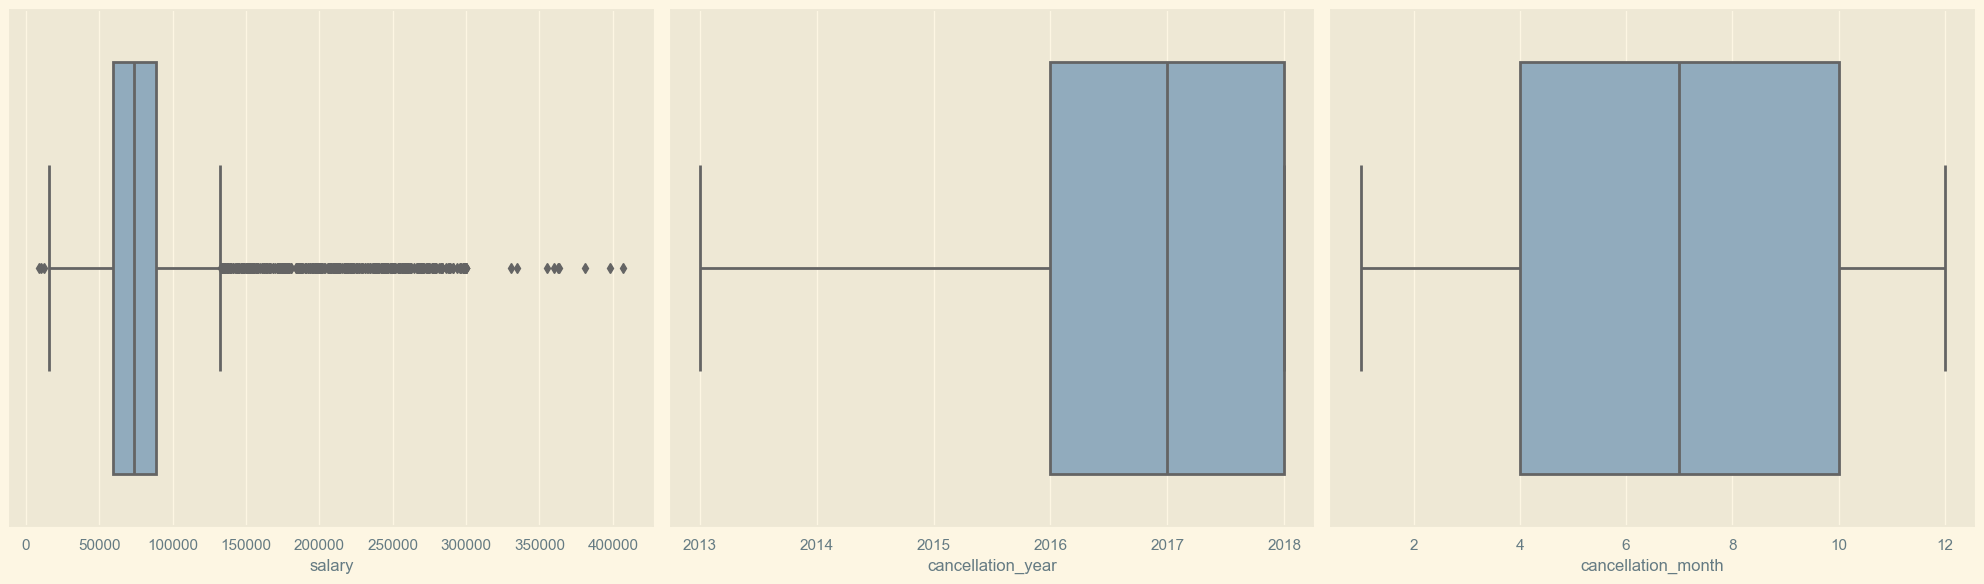

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df_loyalty, ax = axes[indice])
    
plt.tight_layout();

In [29]:
# Sustituy los valores nulos de estas dos variables por 99 ya que no sé los datos y no puedo imputar tal información proque estaría sesgando.
#Asumo que son personas o bien que no se sabe la info o que no han cancelado y siguen siendo miembros 
df_loyalty['cancellation_year'].fillna(99, inplace=True)
df_loyalty['cancellation_month'].fillna(99, inplace=True)

### Para la variable Salary: reviso la mediana y media:

In [30]:
df_loyalty["salary"].describe()[["mean", "50%"]]


mean    79359.340907
50%     73455.000000
Name: salary, dtype: float64

- Para salary podría escoger la mediana y no la media para reemplazar los valores de aquellos nulls. La media muestra un valor más elevado dado que hay bastantes casos (outliers) por arriba que hacen sesgar el dato al alza. 
- Ahora bien, voy a revisar antes los datos de IT y KNN 

In [31]:
# mediana_salary = df_loyalty['salary'].median()
# df_loyalty['salary'].fillna(mediana_salary, inplace=True)


In [32]:
df_loyalty_copia = df_loyalty.copy()
df_loyalty_copia.head(1)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,99.0,99.0


In [33]:

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_loyalty_copia[["salary"]])
imputer_iterative_imputado


array([[83236.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [79359.34090727],
       [57297.        ],
       [75049.        ]])

In [34]:
df_loyalty_copia[["IT_salary"]] = imputer_iterative_imputado
print(f"Después del 'Iterative' tenemos: \n{df_loyalty_copia[['IT_salary']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
IT_salary    0
dtype: int64 nulos


In [35]:
imputer_knn = KNNImputer(n_neighbors = 5)
imputer_knn_imputado = imputer_knn.fit_transform(df_loyalty_copia[["salary"]])
imputer_knn_imputado

array([[83236.        ],
       [79359.34090727],
       [79359.34090727],
       ...,
       [79359.34090727],
       [57297.        ],
       [75049.        ]])

In [36]:
df_loyalty_copia[["KNN_salary"]] = imputer_knn_imputado
print(f"Después del 'KNN' tenemos: \n{df_loyalty_copia[['KNN_salary']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
KNN_salary    0
dtype: int64 nulos


In [37]:
df_loyalty_copia.describe()[["salary","IT_salary", "KNN_salary"]]

,salary,IT_salary,KNN_salary
count,12499.000000,16737.000000,16737.000000
mean,79359.340907,79359.340907,79359.340907
std,34749.691464,30029.311812,30029.311812
min,9081.000000,9081.000000,9081.000000
25%,59246.500000,63899.000000,63899.000000
50%,73455.000000,79359.340907,79359.340907
75%,88517.500000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


- Los datos son exactamente los mismos para IT que para KNN. por lo que puedo escoger cualquiera de los dos
- En este caso escogemos KNN. 
- También podríamos haber optado directamente por la mediana. 

In [38]:
df_loyalty_copia.drop(["salary", "IT_salary"], axis = 1, inplace = True)

# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"KNN_salary": "salary" }
df_loyalty_copia.rename(columns = nuevo_nombre, inplace = True)

In [39]:
df_loyalty_copia['salary'] = df_loyalty_copia['salary'].round(2)

In [40]:
df_loyalty_copia

,loyalty_number,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,99.0,99.0,83236.00
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,Divorced,Star,3839.61,Standard,2016,3,99.0,99.0,79359.34
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,79359.34
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,Single,Star,3839.75,Standard,2013,2,99.0,99.0,79359.34
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,Married,Star,3842.79,Standard,2014,10,99.0,99.0,103495.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,Married,Star,61850.19,Standard,2012,12,99.0,99.0,79359.34
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,Married,Star,67907.27,Standard,2014,9,99.0,99.0,89210.00
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,Single,Star,74228.52,Standard,2014,3,99.0,99.0,79359.34
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,Married,Star,10018.66,2018 Promotion,2018,4,99.0,99.0,57297.00


### FUSIONO AMBOS FICHEROS PARA TRABAJAR CON UNO SOLO: 

In [41]:
df_merged = pd.merge(df_activity, df_loyalty_copia, on='loyalty_number')
df_merged

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99.0,99.0,92552.0
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99.0,99.0,92552.0
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99.0,99.0,92552.0
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99.0,99.0,92552.0
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99.0,99.0,92552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999891,2018,8,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0,75616.0
403756,999891,2018,9,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0,75616.0
403757,999891,2018,10,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0,75616.0
403758,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0,75616.0


In [42]:
df_merged.dtypes

loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year              float64
cancellation_month             float64
salary                         float64
dtype: object

        - Cambio el type de las variables que considero necesarias: 

In [43]:

df_merged['cancellation_year'] = df_merged['cancellation_year'].astype(int)
df_merged['cancellation_month'] = df_merged['cancellation_month'].astype(int)
df_merged['points_accumulated'] = df_merged['points_accumulated'].astype(int)



In [44]:
df_merged

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99,99,92552.0
1,100018,2017,2,2,2,4,1320,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99,99,92552.0
2,100018,2018,10,6,4,10,3110,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99,99,92552.0
3,100018,2017,4,4,0,4,924,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99,99,92552.0
4,100018,2017,5,0,0,0,0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,99,99,92552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403755,999891,2018,8,0,0,0,0,0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017,1,75616.0
403756,999891,2018,9,0,0,0,0,0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017,1,75616.0
403757,999891,2018,10,0,0,0,0,0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017,1,75616.0
403758,999891,2018,11,0,0,0,0,0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,Married,Nova,3745.37,Standard,2016,5,2017,1,75616.0


- guardo el fichero a csv para tenerlo todo fusionado y limpio: 

In [45]:
df_merged.to_csv('../promo-F-DA-modulo3-evaluacion-final-MargaObrador/Files/df_merged_final_19122023.csv')

# Fase 2: Visualización

Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:



In [46]:
df_merged["year"].value_counts()

year
2018    202022
2017    201738
Name: count, dtype: int64

        - ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

- Hago un barplot, todas son variables numéricas (no categóricas y por ello podría hacer también un boxplot pero la visualización de barplot queda mejor) y lo que quiero es poder ver la distribución entre las categorías. 

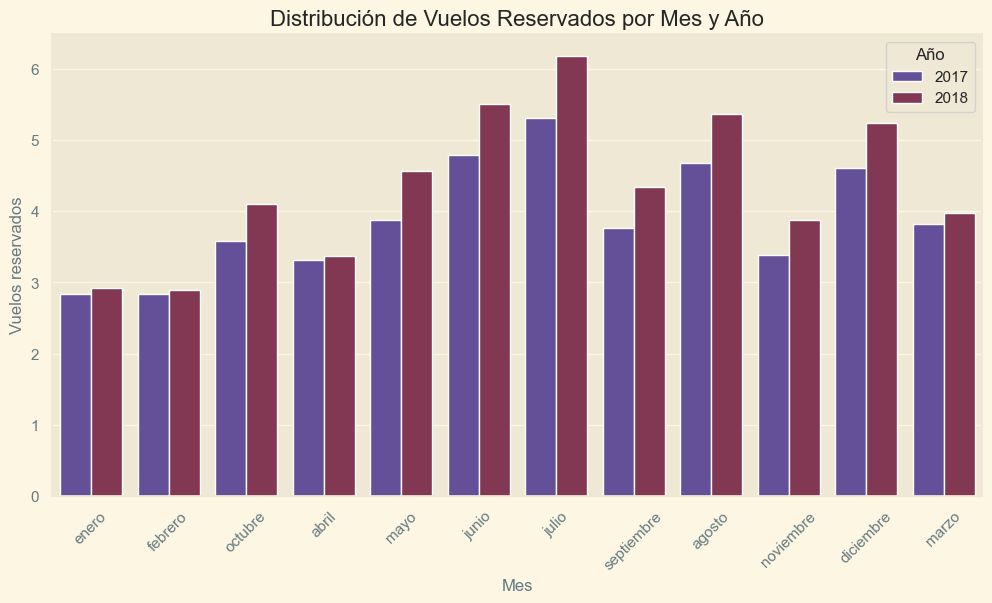

In [47]:

meses_labels = {1: 'enero', 2: 'febrero', 3: 'marzo', 4: 'abril', 5: 'mayo', 6: 'junio',
                 7: 'julio', 8: 'agosto', 9: 'septiembre', 10: 'octubre', 11: 'noviembre', 12: 'diciembre'}

df_merged['nombre_mes'] = df_merged['month'].map(meses_labels)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_merged, x='nombre_mes', y='flights_booked', ci=None, hue='year', palette='twilight')
plt.xlabel('Mes')
plt.ylabel('Vuelos reservados')
plt.title('Distribución de Vuelos Reservados por Mes y Año')
plt.legend(title='Año')
plt.xticks(rotation=45)  
plt.show(); 


- Según los datos, los meses donde hay más reservas en general son los de junio, julio, agosto y diciembre para ambos años. 
- Comparando por año, los datos muyestran que en 2018 ha habido más reservas que en 2017 para todos los meses, sobretodo en el mes de julio, agosto y diciembre (en términos absolutos)

- Los datos muestra un aumento de las reservas en fechas señaladas tales como verano y navidades, además de un crecimiento en el número de reservas de 2017 a 2018. 

        - ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

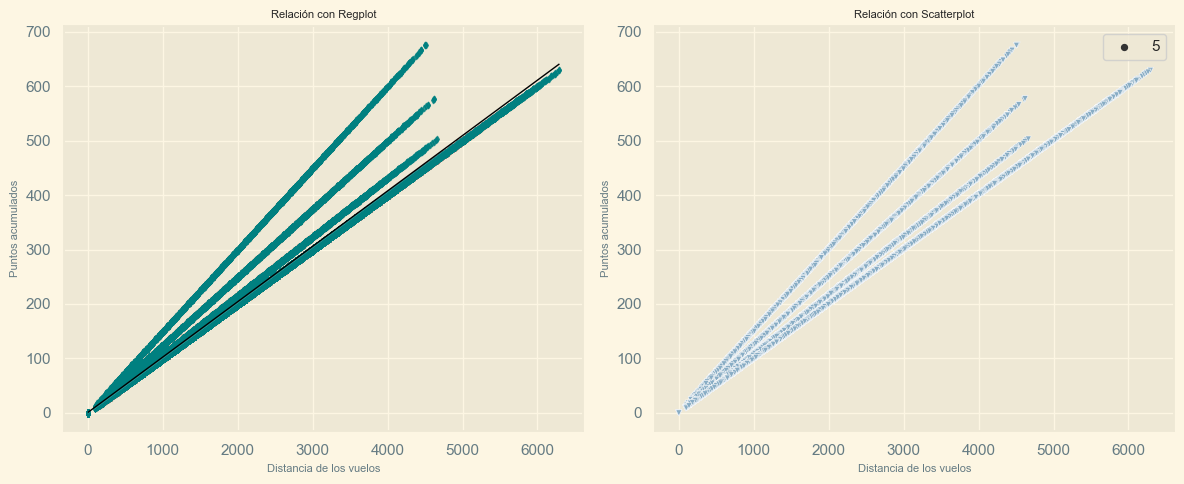

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(x="distance", 
            y="points_accumulated", 
            data=df_merged, 
            marker="d", 
            line_kws={"color": "black", "linewidth": 1}, 
            scatter_kws={"color": "teal", "s": 10},
            ax=axes[0])


axes[0].set_xlabel("Distancia de los vuelos", fontsize=8)
axes[0].set_ylabel("Puntos acumulados", fontsize=8)
axes[0].set_title("Relación con Regplot", fontsize=8)

sns.scatterplot(x="distance", 
                y="points_accumulated", 
                data=df_merged,
                size=5, marker="v", 
                ax=axes[1])


axes[1].set_xlabel("Distancia de los vuelos", fontsize=8)
axes[1].set_ylabel("Puntos acumulados", fontsize=8)
axes[1].set_title("Relación con Scatterplot", fontsize=8)

plt.tight_layout()
plt.show();


- Los datos muestran como la relación entre ambas variables es positiva, es decir, cuanta más distancia recorrida del vuelo, mayor es el número de puntos que se obtienen. 

        - ¿Cuál es la distribución de los clientes por provincia o estado?


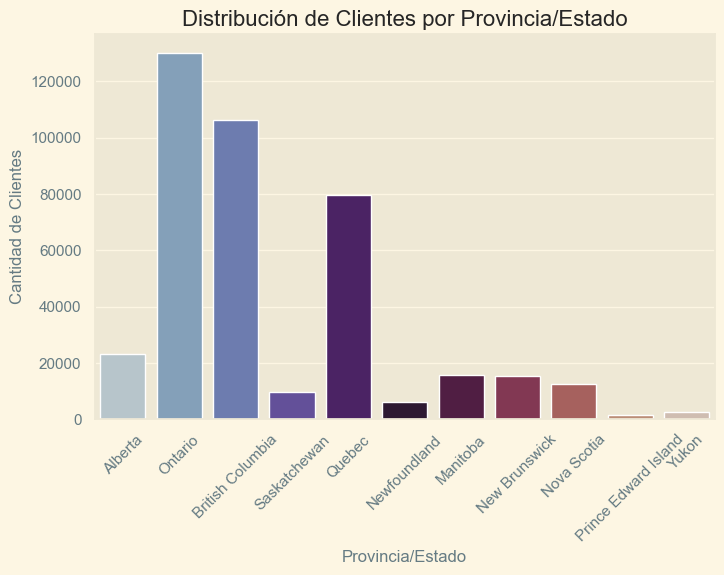

In [49]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_merged, x='province', palette='twilight')
plt.xlabel('Provincia/Estado')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Clientes por Provincia/Estado')
plt.xticks(rotation=45)  
plt.show();


- Los datos nos muestran que la mayor parte de los clientes son de Ontario, British Columbia y Quebec.
- Por otro lado, las provincias con menor cantidad de clientes son Yukon y Prince Edward Island

    - ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


In [50]:
df_merged.head(1)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,salary,nombre_mes
0,100018,2017,1,3,0,3,1521,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.2,Standard,2016,8,99,99,92552.0,enero


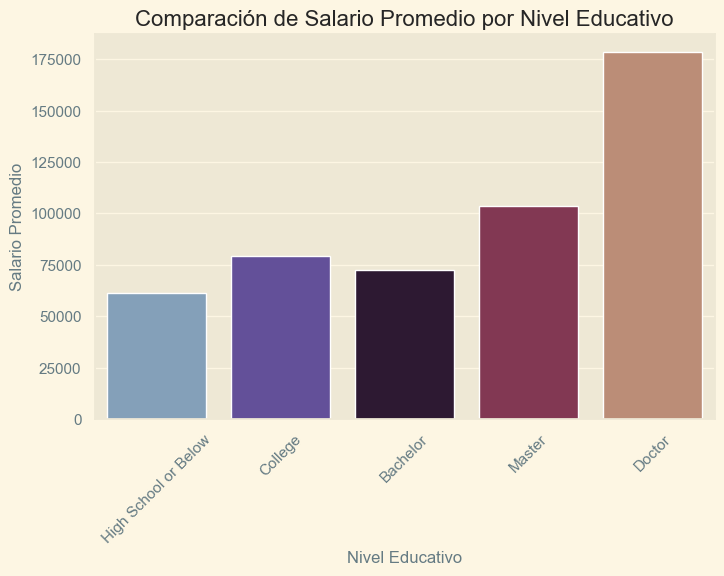

In [51]:
# El barplot muestra la distribución de una variable numérica para cada categoría en una variable categórica

order_edu = ["High School or Below", "College", "Bachelor", "Master", "Doctor"]

plt.figure(figsize=(8, 5))
sns.barplot(data=df_merged, x='education', y='salary', order=order_edu, ci=None, palette='twilight')
plt.xlabel('Nivel Educativo')
plt.ylabel('Salario Promedio')
plt.title('Comparación de Salario Promedio por Nivel Educativo')
plt.xticks(rotation=45) 
plt.show(); 

# estimator='mean' para presentar los datos resumidos o agrupados en la media. Saca el promedio de Y para X. 

- Los datos nos sugieren que: 

- Los clientes con nivel educativo "Doctorado" tienen, en promedio, un salario más alto.
- Los clientes con niveles educativos más bajos muestran salarios promedio más bajos, siendo los de educación "Bachelor" los siguientes con salarios más bajos.
- Los individuos con nivel eduactivo College, tienen ingresos mayores a los de Bachelor, aún cuando este segundo nivel es más alto. 
- En general, se evidencia un patrón que indica que a medida que el nivel educativo aumenta, también lo hace el salario, excepto en los casos particulares de College y Bachelor, donde la relación parece ser inversa.


    - ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [52]:
df_tarjetas = df_merged.groupby("loyalty_card")["loyalty_number"].count().reset_index()
df_tarjetas

,loyalty_card,loyalty_number
0,Aurora,83132
1,Nova,136883
2,Star,183745


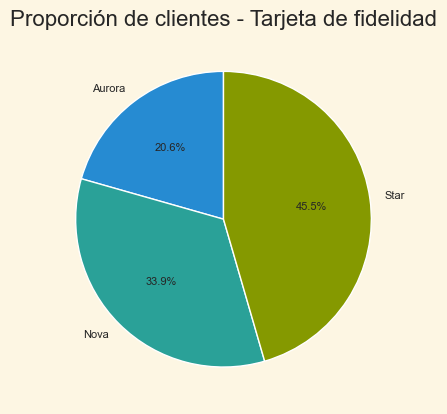

In [76]:
plt.pie("loyalty_number", labels= "loyalty_card",
        data = df_tarjetas, 
        autopct=  '%1.1f%%', 
        textprops={'fontsize': 8}, 
        startangle=90)
plt.title("Proporción de clientes - Tarjeta de fidelidad")
plt.show(); 

- El 45.5% tiene la tarjeta Star que según los datos, es la tarjeta con más clientes. 
- La tarjeta con una proporción de clientes más baja es "Aurora" 

    - ¿Cómo se distribuyen los clientes según su estado civil y género?

In [54]:
df_merged["marital_status"].value_counts()

marital_status
Married     234845
Single      108153
Divorced     60762
Name: count, dtype: int64

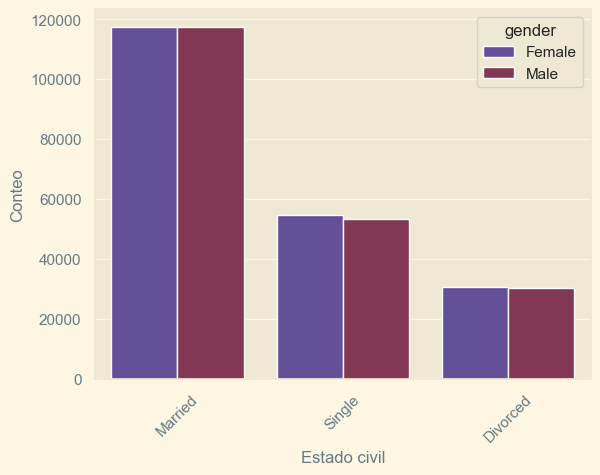

In [78]:
#marital status y gender son objects. Optamos por un countplot. 

sns.countplot(x = "marital_status", 
              data = df_merged, 
              palette = "twilight", 
              order = ['Married', 'Single', 'Divorced'], 
              hue = "gender")


plt.xticks(rotation = 45)
plt.xlabel("Estado civil")
plt.ylabel("Conteo"); 

- Los datos nos muestran que: 
    -   El gran grueso de cliente se encuentra casado. 
    -   Los que menos viajan están divorciados. 
    -   No parece haber una diferencia de comportamiento en cuanto a género, ya que las distribuciones por estado civil son bastantes pares, así como el conteo de viajes. 

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Objetivo del Ejercicio: 
- Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:


-        Nuestra HO: No hay diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos de los clientes.
-        Nuestra H1: Existen diferencias significativas en el número de vuelos reservados entre los diferentes niveles educativos de los clientes.


Preparación de Datos:
- Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


In [56]:
df_fase3 = df_merged[["flights_booked", "education"]]
df_fase3

,flights_booked,education
0,3,Bachelor
1,2,Bachelor
2,6,Bachelor
3,4,Bachelor
4,0,Bachelor
...,...,...
403755,0,Bachelor
403756,0,Bachelor
403757,0,Bachelor
403758,0,Bachelor


In [57]:
df_fase3["education"].value_counts()

education
Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: count, dtype: int64

In [58]:
df_fase3["education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

- Agrupo los valores de High School en Basic y el resto en superior

In [59]:
def asignar_educacion(valor):
    if valor in ['High School or Below']:
        return 'Basic'
    else:
        return 'Superior'

df_fase3['educ_group'] = df_fase3['education'].apply(asignar_educacion)



Análisis Descriptivo:
- Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.


In [60]:
analisis_descr_educ_group= df_fase3.groupby('educ_group')['flights_booked'].describe()
analisis_descr_educ_group


,count,mean,std,min,25%,50%,75%,max
educ_group,,,,,,,,
Basic,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Superior,384845.0,4.131978,5.229609,0.0,0.0,1.0,8.0,21.0


In [61]:
analisis_descr_education = df_fase3.groupby('education')['flights_booked'].describe()
analisis_descr_education


,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


Prueba Estadística:
- Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [62]:
sns.set_style("whitegrid")
sns.set_theme(style="dark")
plt.style.use('Solarize_Light2')

In [63]:
def exploracion_dataframe(dataframe, columna_control):

    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # como estamos en un problema de A/B testing y lo que realmente nos importa es comparar entre el grupo de control y el de test, los principales estadísticos los vamos a sacar de cada una de las categorías
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

- Saco las medias de ambos grupos: 

In [64]:
filtro_superior = df_fase3[df_fase3['educ_group'] == 'Superior']
media_vuelos_superior = filtro_superior['flights_booked'].mean()

print("La media de vuelos reservados para el grupo 'Superior' es:", media_vuelos_superior)

filtro_basic = df_fase3[df_fase3['educ_group'] == 'Basic']
media_vuelos_basic = filtro_basic['flights_booked'].mean()

print("La media de vuelos reservados para el grupo 'Basic' es:", media_vuelos_basic)

La media de vuelos reservados para el grupo 'Superior' es: 4.131977809247879
La media de vuelos reservados para el grupo 'Basic' es: 4.176209357652657


In [65]:
df_basic = df_fase3[df_fase3["educ_group"]=="Basic"]
df_superior = df_fase3[df_fase3["educ_group"]=="Superior"]

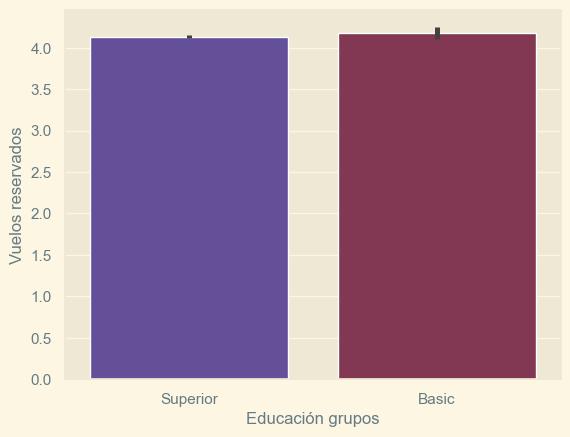

In [79]:
# Comparando medias entre grupos 
sns.barplot(x="educ_group", y="flights_booked", data=df_fase3, palette="twilight")
plt.xlabel("Educación grupos")
plt.ylabel("Vuelos reservados")
plt.show()

### Test de normalidad  - Kolmogorov Smirnoff

In [67]:
def normalidad(dataframe, columna):
    statistic, p_value = kstest(dataframe[columna], "norm")
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(df_fase3,"flights_booked")

Para la columna flights_booked los datos no siguen una distribución normal.


 - No se ajusta a la distribución normal, por lo que podemos comprobar directamente con la prueba no paramétrica de Mann- Whitney. 
 - PERO vamos a comprobar con el resto, solo por practicar: 

### Test de normalidad  - Shapiro

- Para poder testear esta prueba, tengo que convertir la columna de educación a numérica, ya que al ser categórica me da error. Así hago un mapeo de las alternativas, siendo: 
- Educación básica = 0 y Educación Superior = 1 

In [68]:
# Mapear las categorías 'Basic' y 'Superior' a valores numéricos 0 y 1 respectivamente
mapping = {'Basic': 0, 'Superior': 1}

# Aplicar el mapeo a la columna 'education_group'
df_fase3['education_group_numeric'] = df_fase3['educ_group'].map(mapping)


In [69]:
df_fase3

,flights_booked,education,educ_group,education_group_numeric
0,3,Bachelor,Superior,1
1,2,Bachelor,Superior,1
2,6,Bachelor,Superior,1
3,4,Bachelor,Superior,1
4,0,Bachelor,Superior,1
...,...,...,...,...
403755,0,Bachelor,Superior,1
403756,0,Bachelor,Superior,1
403757,0,Bachelor,Superior,1
403758,0,Bachelor,Superior,1


In [70]:
def normalidad(dataframe, columna):


    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal. (No se rechaza H0)")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal. (se rechaza H0)")


In [71]:
metricas = ['education_group_numeric', 'flights_booked']

for metrica in metricas:
    normalidad(df_fase3 ,metrica)

Para la columna education_group_numeric los datos no siguen una distribución normal. (se rechaza H0)
Para la columna flights_booked los datos no siguen una distribución normal. (se rechaza H0)


- Ya sabíamos que no iban a seguir una distribución normal, así que vamos con la prueba de Levene

### Test de homogeneidad de las varianzas - Levene

In [72]:

grupo_Basic_c = df_fase3[df_fase3['educ_group'] == 'Basic']['flights_booked']
grupo_Superior_t = df_fase3[df_fase3['educ_group'] == 'Superior']['flights_booked']

stat, p = levene(grupo_Basic_c, grupo_Superior_t)
print("Estadística de Levene:", stat)
print("Valor p:", p)

Estadística de Levene: 0.800016688644706
Valor p: 0.37108891330451155


- En este caso, la prueba de Levene nos muestra que: 
    - las varianzas no son homogéneas entre los dos grupos que estamos analizando (Basic Education and Superior Education)

### Independencia

In [73]:
# Realizo la prueba t para comparar las medias de dos grupos (por ejemplo, Control - basic  vs. Test - superior )
grupo_Basic_c = df_fase3[df_fase3['educ_group'] == 'Basic']['flights_booked']
grupo_Superior_t = df_fase3[df_fase3['educ_group'] == 'Superior']['flights_booked']


t_stat, p_ttest = ttest_ind(grupo_Basic_c, grupo_Superior_t)
print(f"Prueba t para 'flights_booked' entre Basic_Control y Superior_Test - p-valor: {p_ttest}")
print(f"T-statistic: {t_stat}")

Prueba t para 'flights_booked' entre Basic_Control y Superior_Test - p-valor: 0.25614177844599195
T-statistic: 1.1355591716005322


Los datos nos muestran que: 

- Valor p de  0.00085: hay evidencia suficiente para rechazar la H0, por tanto hay diferencias significativas entre los grupos de niveles de estudios Basic y Superior en cuanto a la reserva de vuelos. 
- T-statistic de -3.34: nos indica (al ser negativo), que la media del número de vuelos reservados por parte de los del grupo de "Basic_Control" es menor que la media del grupo con estudios Superiores. 


### AHORA BIEN...

- Al no cumplirse el supuesto de normalidad ni homogeneidad de nuestros datos, terminamos haciendo la prueba no paramétrica (Mann Whitney)
- Así podemos comparar las dos muestras que parecen ser independiente y determinamos si vienen de poblaciones con medianas diferentes. 


No hay diferencias significaticas entre los dos grupos de nivel de estudios en cuanto a número de vuelos reservados 

In [74]:

grupo_superior = df_fase3[df_fase3['educ_group'] == 'Superior']['flights_booked']
grupo_basico = df_fase3[df_fase3['educ_group'] == 'Basic']['flights_booked']

statistic, p_value = mannwhitneyu(grupo_superior, grupo_basico)

print(f"Prueba de Mann-Whitney U para 'flights_booked' entre Superior y Basic - p-valor: {p_value}")




Prueba de Mann-Whitney U para 'flights_booked' entre Superior y Basic - p-valor: 0.12400336700423258


- Los datos sugieren que: 
- Al tener un P de 0.124, no hay suficiente evidencia para rechazar la hipótesis nula. Por tanto, NO se han encontrado diferencias significativa en el número de vuelos reservados entre los grupos Superior y Basic. 

En resumen, según esta prueba, no hay evidencia estadística suficiente para afirmar que existen diferencias significativas en la cantidad de vuelos reservados entre estos dos grupos educativos. Por lo tanto NO podemos rechazar la H0 y por consiguiente, NO podemos confirmar que haya un efecto significativo directo entre el nivel de estudios y el número de vuelos reservados. 